Эталоны ЯВ 1-го, 2-го и 3-го порядков:

$$w_{1}(t_{1}) = e^{-\alpha \tau_{1}}$$

$$w_{2}(\tau_{1},\tau_{2}) = \frac{\beta }{\alpha }(e^{-\alpha(\tau_{1}+\tau_{2})} - e^{-\alpha\tau_{2}}), \tau_{1}\leq \tau_{2}$$

$$w_{3}(\tau_{1},\tau_{2},\tau_{3}) = \frac{1}{3}{(\frac{\beta }{\alpha })}^2(e^{\alpha(\tau_{1}-\tau_{2}-\tau_{3})} + 3e^{-\alpha(\tau_{2}+\tau_{2}+\tau_{3})} - 4e^{-\alpha(\tau_{2}+\tau_{3})} - 2e^{-\alpha(\tau_{1}+\tau_{3})} + 2e^{-\alpha\tau_{3}} ), \tau_{1}\leq \tau_{2}\leq \tau_{3}$$

Диагональные сечения ЯВ получаем полагая $$\tau_{1} = \tau_{2} = \tau_{3} = t$$

$$w_{2}(t,t) = \frac{\beta}{\alpha}(e^{-2\alpha t} - e^{-\alpha t})$$

$$w_{3}(t,t,t) = {(\frac{\beta }{\alpha })}^2(e^{-3\alpha t} - 2e^{-2\alpha t} + e^{-\alpha t})$$

Переходная функция $h_{1}(t)$ и диагональные сечения переходных функций втрого $h_{2}(t,t)$  и третьего $h_{3}(t,t,t)$ порядков равны:

$$h_{1}(t) = \frac{1}{\alpha}(1 - e^{-\alpha t})$$

$$h_{2}(t,t) = \frac{\beta}{\alpha^{3}}(e^{-2\alpha t}+2\alpha te^{-\alpha t} - 1)$$

$$h_{3}(t,t,t) = \frac{{\beta}^2}{\alpha^{6}}(A+Be^{-\alpha t} + Ce^{-2\alpha t} + De^{-3\alpha t})$$

Где $A=2{\rm \alpha ,}\; B=2-3{\rm \alpha }-2{\rm \alpha }^{{\rm 2}} t(1+{\rm \alpha }t),\; C=-2(1+{\rm \alpha }t-{\rm \alpha }),\; D=-{\rm \alpha .}\ $


Передаточная функция системы имеет вид:
$$H(p)=\frac{1}{s+2.64}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def object_os_weight(order, t):
    if order>3:
        print("Etalon may be in range of 1 to 3!")
        return None
    a = 2.65
    b = 1.45
    return{
        1:np.exp(-a*t),
        2:(b/a * (np.exp(-2*a*t) - np.exp(-a*t))),
        3:((b/a)**2 * (np.exp(-3*a*t) - 2*np.exp(-2*a*t) + np.exp(-a*t)))
    }.get(order, None)

def object_os_step(order, t):
    if order>3:
        print("Etalon may be in range of 1 to 3!")
        return None
    a = 2.65
    b = 1.45
    if order==1:
        return (-np.exp(-a*t) + 1) / a
    elif order==2:
        return (b/a**3) * (np.exp(-2*a*t) + 2*a*t*np.exp(-a*t) - 1)
    elif order==3:
        A = 2 * a;
        B = 2 - 3*a - 2*(a**2)*t - 2*(a**3)*(t**2);
        C = -2 * (1 - a + a*t);
        D = -a;
        return (b**2 / a**6) * (A + B*np.exp(-a*t) + C*np.exp(-2*a*t) + D*np.exp(-3*a*t))
    

Переходная характеристика первого порядка (рисунок 1)

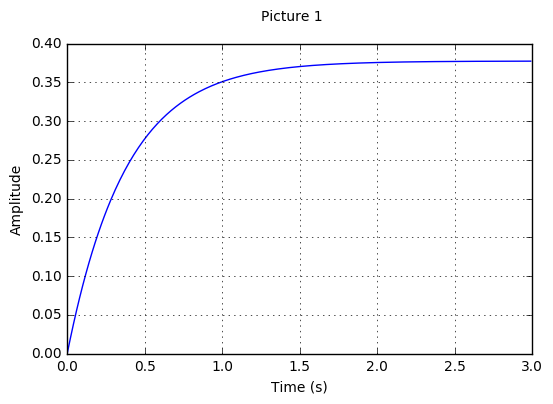

In [3]:
t = np.arange(0,3,0.01)
y = object_os_step(1, t)


plt.figure(1)
plt.plot(t,y)
plt.grid(True)
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.text(1.25,0.43, 'Picture 1')
plt.show()


Диагональное сечение переходной характеристики второго порядка (рисунок 2)

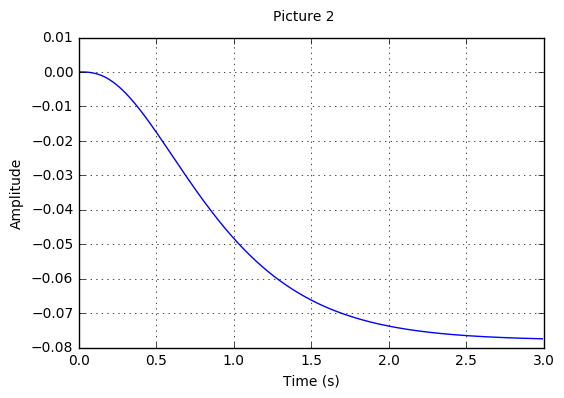

In [4]:
y = object_os_step(2, t)
plt.figure(2)
plt.plot(t,y)
plt.grid(True)
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.text(1.25,0.015, 'Picture 2')
plt.show()

Диагональное сечение переходной характеристики третьего порядка (рисунок 3)

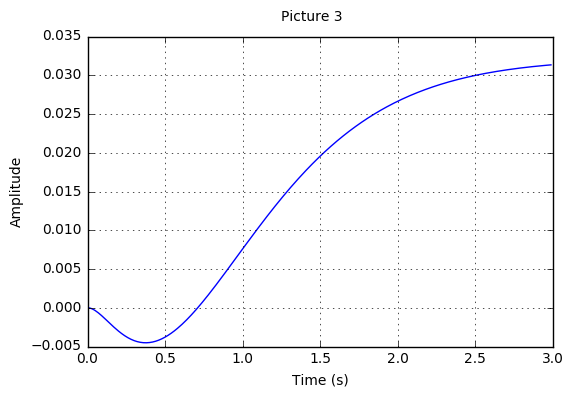

In [5]:
y = object_os_step(3, t)
plt.figure(3)
plt.plot(t,y)
plt.grid(True)
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.text(1.25,0.037, 'Picture 3')
plt.show()

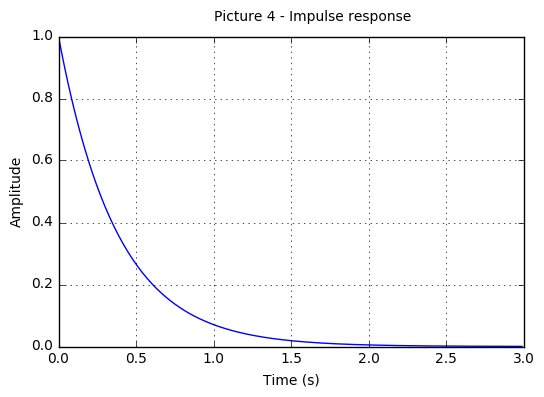

In [6]:
y = object_os_weight(1,t)
plt.figure(4)
plt.plot(t,y)
plt.grid(True)
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.text(1,1.05, 'Picture 4 - Impulse response')
plt.show()

In [7]:
import control as ctr


    1
--------
s + 2.64



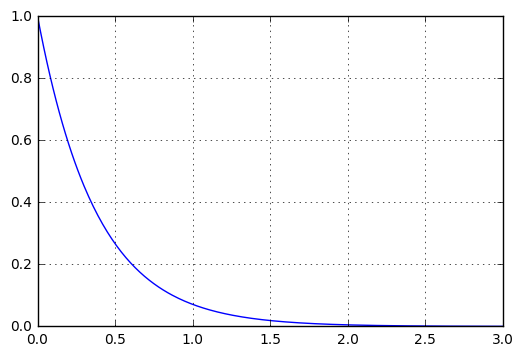

In [104]:
a = 2.64
b = 1.45
sys = ctr.tf([1],[1.,a])
print(sys)
time = np.arange(0,3.01,0.01)

resp, t = ctr.impulse(sys, time)

plt.figure(5)
plt.plot(t, resp)
plt.grid(True)
plt.show()

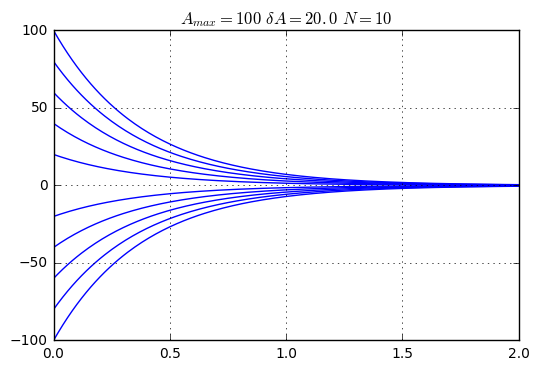

In [136]:
def expRange(start, end, step):
    while start <= end:
        yield start
        start += step

Amax = 100
expCount = 10
step = (2*Amax)/expCount
T = 2
timeStep = 0.01
time = np.arange(0,T+timeStep,timeStep)
globalResp = np.empty((time.size, 1, expCount))
currentDepth = 0
for x in expRange((-Amax), Amax, 20):
    if x==0:
        continue
    gain = ctr.tf([x],[0,1])
    currentSys = ctr.series(gain, sys)
    resp, t = ctr.impulse(currentSys, time)
    globalResp[:,0,currentDepth] = resp
    currentDepth+=1

plt.figure(6)
for x in range(0,10):
    plt.plot(time, globalResp[:,0,x].transpose(), 'b')
plt.title(r'$A_{max} = %s$ $\delta A = %s$ $N = %s$'%(Amax,step, expCount))
plt.grid(True)
plt.show()
